In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from slds.models.hmm.model import *
from slds.models.hmm.inference import *

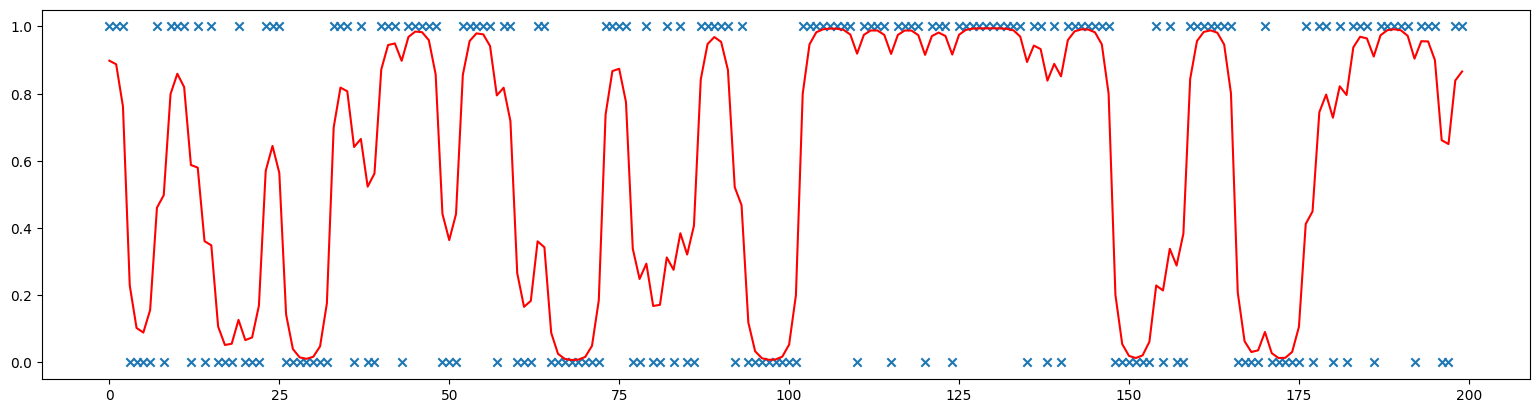

In [3]:
A = jnp.array([[.9, .1], [.1, .9]]) # transition probabilities
a0 = jnp.array([.5, .5]) # initial state probabilities
C = jnp.array([[.8, .2], [.2, .8]]) # emission probabilities
T = 200

key_obs = jax.random.PRNGKey(0)

model = Hmm(A, a0, C)
s, x = hmm_sample(key_obs, model, T)
inference_state = hmm_inference_init(model, x)
inference_state = hmm_inference_update(inference_state)

posterior = hmm_inference_posterior(inference_state)
state_probabilities = vmap(discrete_meanparams)(posterior.marginals.singletons)

fig = plt.figure(figsize=[6.4*3, 4.8])
plt.scatter(jnp.arange(0, T), x, marker='x')
plt.plot(state_probabilities[g:,1], color='red');